In [9]:
# Experiment 6: Implement the non-parametric Locally Weighted Regression 
# algorithm in order to fit data points. Select appropriate data set for your 
# experiment and draw graphs. 
# Code Implementation: 

import numpy as np                 
import matplotlib.pyplot as plt                                                                            


In [13]:
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(scale=0.2, size=X.shape)

In [14]:
def kernel(x, x_i, tau):
    return np.exp(-((x - x_i) ** 2) / (2 * tau ** 2))

In [15]:
def locally_weighted_regression(X_train, y_train, x_test, tau):
    m = X_train.shape[0]
    weights = kernel(X_train, x_test, tau)
    W = np.diag(weights)

    X_design = np.vstack([np.ones(m), X_train]).T  # Add bias term
    theta = np.linalg.pinv(X_design.T @ W @ X_design) @ (X_design.T @ W @ y_train)

    return np.dot([1, x_test], theta)

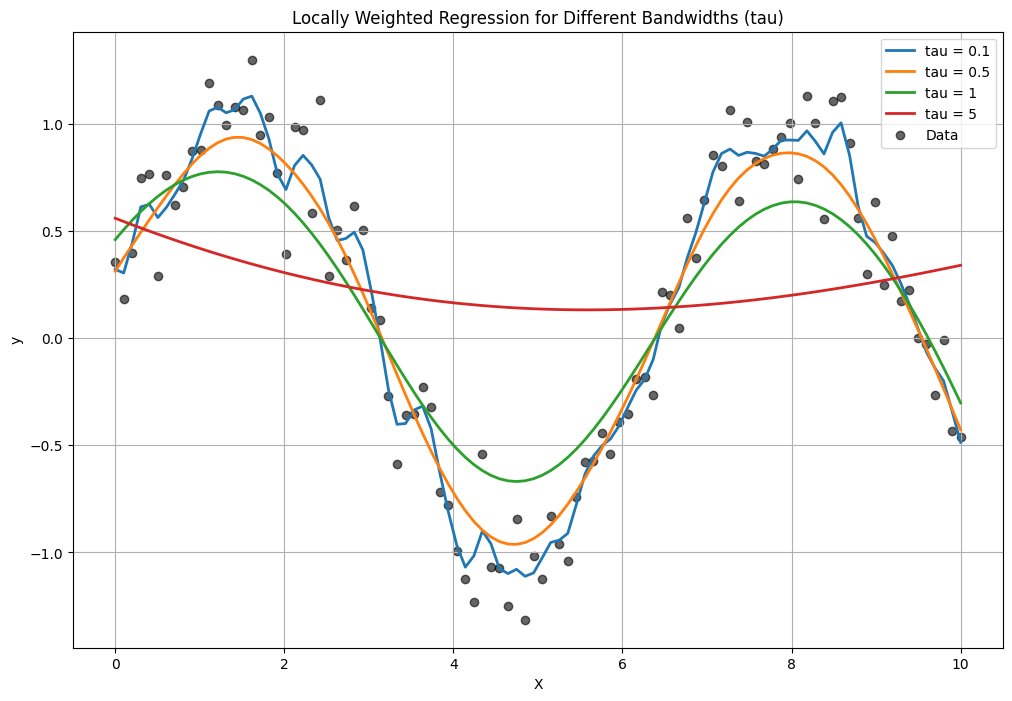

In [20]:
tau_values = [0.1, 0.5, 1, 5]
plt.figure(figsize=(12, 8))

for tau in tau_values:
    y_pred = np.array([locally_weighted_regression(X, y, x_i, tau) for x_i in X])
    plt.plot(X, y_pred, label=f'tau = {tau}', linewidth=2)

plt.scatter(X, y, color='black', label='Data', alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Locally Weighted Regression for Different Bandwidths (tau)")
plt.legend()
plt.grid(True)
plt.show()